# Converting Apeer annotations to usable formats




Options: 
- use a free open software to annotate image and export to common format (PascalVOC, COCO, etc)
- use the previously done CoCo annotations to subset (with proportion control) the annotated parts. 
- use the apeer annotations and convert them to common formats. This is already done for the predictions (mask -> coco)





## Description

With the goal of developping a model that can work from partial annotations, as Apeer is doing, we will use Apeer annotation tool and its exported annotations. This will allow for quick modifications of the annotations for a model update. 

The final goal is to have an experimental annotation pipeline with a model trained from partially annotated data. 

**This notebook focuses on annotations convertion.**



## Available Data from Apeer

Only bounding boxes seem exportable easilly (xml). 

Masks are exported as "json". "json" is actually a textual representation that need parsing. 
One way can be to use the file to create a table. It's doable but 



Tiff (ome-tiff) seem not easilly redable: check https://forum.image.sc/t/update-of-apeer-ometiff-library-to-read-write-ome-tiff-files-from-python/40389

And Apeer website: https://www.apeer.com/blog/ome-tiff

Helper scripts: https://github.com/zeiss-microscopy/OAD/tree/master/jupyter_notebooks

Napari viewer (?): https://github.com/napari/napari

Solution is to convert the tiff binary masks to CoCo annotations -> second notebook



In [2]:
# Imports

import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import os
import glob

#import apeer-ometiff-library

## Read the data

In [3]:
data_dir = "../00_data/5_ApeerPartialAnnotations/"


csv_annotation_files = glob.glob(os.path.join(data_dir, '*_annotation.csv'))
json_annotation_files = glob.glob(os.path.join(data_dir, '*_annotation.json'))
ometiff_annotation_files = glob.glob(os.path.join(data_dir, '*ome.tiff'))

print(json_annotation_files)

['../00_data/5_ApeerPartialAnnotations/220422_752x480-Sample74.jpg_annotation.json', '../00_data/5_ApeerPartialAnnotations/220324_752x480-Sample_20.jpg_annotation.json', '../00_data/5_ApeerPartialAnnotations/220420_752x480-Sample37.jpg_annotation.json', '../00_data/5_ApeerPartialAnnotations/Marinated_Clams_uz1_od_02032022-Image.tif_annotation.json', '../00_data/5_ApeerPartialAnnotations/220324_752x480-Sample_19.jpg_annotation.json', '../00_data/5_ApeerPartialAnnotations/220331_752x480-Sample_25.jpg_annotation.json']


### CSV files

In [4]:
for annotation_file in csv_annotation_files:
    print(f"Reading file {annotation_file}")
    df = pd.read_csv(annotation_file, sep=";", header=0)
    
    print(df.columns)
    
    # We keep only useful columns
    
    df = df.loc[:,["Scope Name", "ID", "Annotation Name", "Class", "X Min", "X Max", "Y Min", "Y Max", "Type"]]
    
    
    df_particles = df.loc[(df["Class"] == "particle")]
    df_background = df.loc[(df["Class"] == "background")]
    # We ignore the predicted particles and background for now
    
    #print(df_particles["Class"].unique())
    #print(df_background["Class"].unique())
    
    
    break
    

Reading file ../00_data/5_ApeerPartialAnnotations/220324_752x480-Sample_19.jpg_annotation.csv
Index(['Scope Name', 'ID', 'Annotation Name', 'Class', 'X Min', 'X Max',
       'Y Min', 'Y Max', 'Z Min', 'Z Max', 'T Min', 'T Max', 'Type',
       'Color (RGB Hex)', 'Area', 'Area Unit', 'Circumference',
       'Circumference Unit', 'Length', 'Length Unit', 'Count'],
      dtype='object')


### Json files

In [5]:

for annotation_file in csv_annotation_files:
    print(f"Reading file {annotation_file}")
    break

Reading file ../00_data/5_ApeerPartialAnnotations/220324_752x480-Sample_19.jpg_annotation.csv


In [6]:
csv_annotation_files[0]

'../00_data/5_ApeerPartialAnnotations/220324_752x480-Sample_19.jpg_annotation.csv'

### Json is actually table

https://stackoverflow.com/questions/57564484/how-to-extract-a-table-from-text-files-in-python


In [7]:
import pandas as pd
import numpy as np

with open(csv_annotation_files[0]) as f:
    lines = f.readlines()

### Image files



In [8]:
# import the libraries
from apeer_ometiff_library import io, processing, omexmlClass

# import script with some useful functions
import sys
sys.path.append(r'modules')
import imgfileutils as imf
from IPython.display import display, HTML

ModuleNotFoundError: No module named 'imgfileutils'

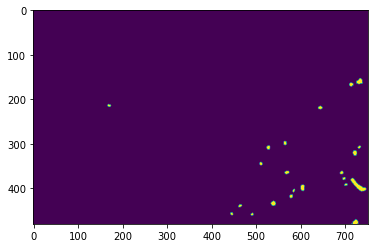

23


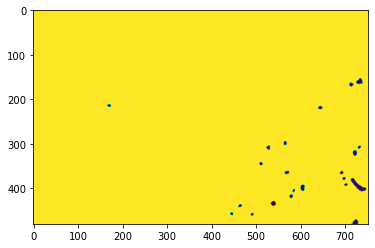

3
[[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]


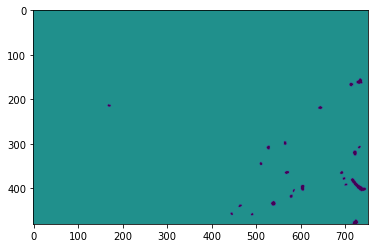

----------------


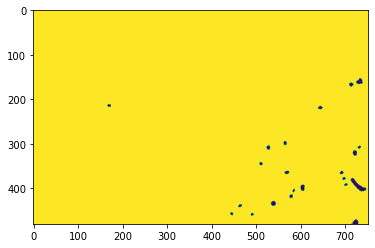

In [9]:
# test
import matplotlib.pyplot as plt
import cv2


path = "./data/particles/trainsmall/annotations_PNG/0-0.PNG"

img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img)
plt.show()

n, labels = cv2.connectedComponents(img.astype('uint8'))

print(n)

img_rev = 255-img
plt.imshow(img_rev)
plt.show()


n2, labels2 = cv2.connectedComponents(img_rev.astype('uint8'))



print(n2)
print(labels2)

plt.imshow(labels2)
plt.show()


# island

islands = [labels2 == i for i in range(1, n2-1)]

print("----------------")

for im in islands:
    plt.imshow(im)
    plt.show()

uint8


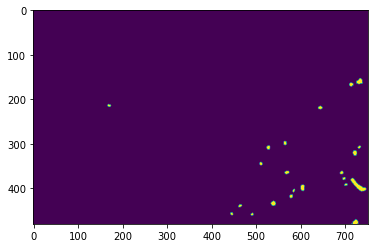

(23, array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32), array([[     0,      0,    752,    480, 359470],
       [   726,    153,     14,     13,    125],
       [   710,    163,      9,      9,     58],
       [   167,    211,      8,      6,     35],
       [   640,    215,     10,      8,     53],
       [   563,    294,      7,      9,     48],
       [   524,    304,      8,      9,     56],
       [   729,    304,      7,      7,     31],
       [   718,    315,      9,     12,     86],
       [   508,    341,      7,      7,     37],
       [   565,    361,     10,      7,     56],
       [   689,    361,      8,      7,     42],
       [   695,    375,      7,      6,     32],
       [   713,    377,     35,     30,    345],
       [   699,    389,      7,      5,     29],
       [   601,    392,      9,     14,  

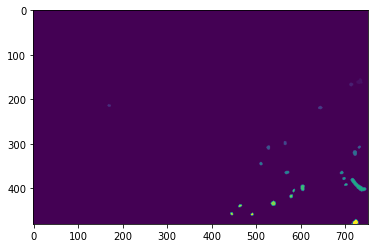

In [ ]:
# import the necessary packages
import argparse
import cv2



path = "./data/particles/trainsmall/annotations_PNG/0-0.PNG"


# load the input image from disk, convert it to grayscale, and
# threshold it
image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

#image = 255-image

print(image.dtype)

#print(thresh)
plt.imshow(image)
plt.show()

# apply connected component analysis to the thresholded image
(numLabels, labels, stats, centroids) = cv2.connectedComponentsWithStats(image, 4, cv2.CV_32S)

print((numLabels, labels, stats, centroids))

plt.imshow(labels)
plt.show()

[INFO] examining component 1/23 (background)


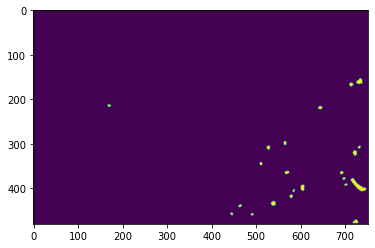

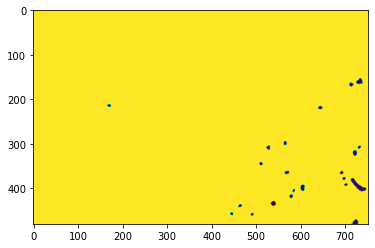

[INFO] examining component 2/23


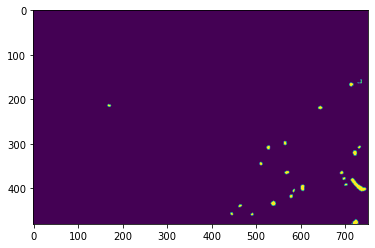

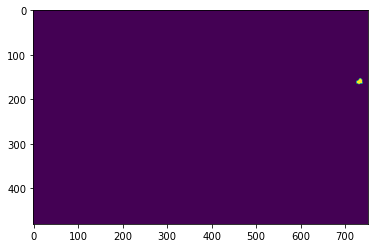

[INFO] examining component 3/23


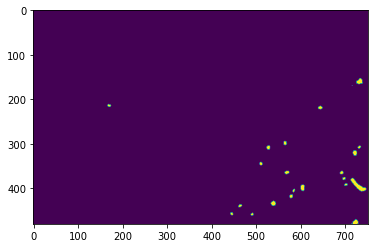

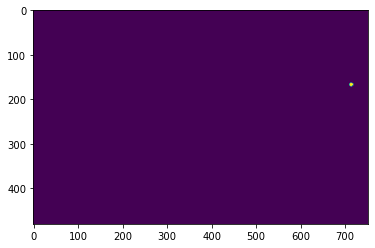

[INFO] examining component 4/23


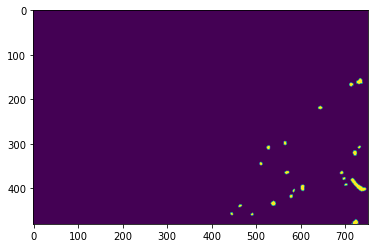

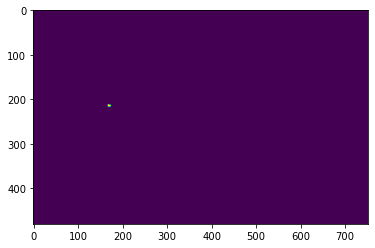

[INFO] examining component 5/23


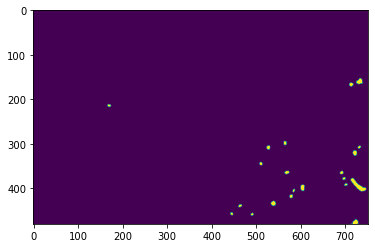

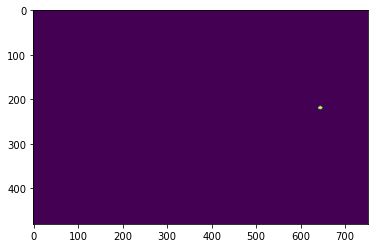

[INFO] examining component 6/23


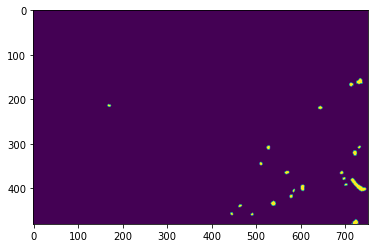

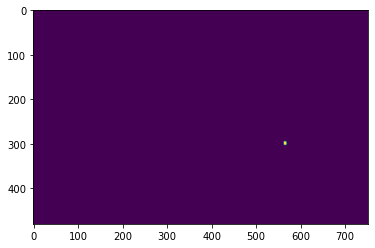

[INFO] examining component 7/23


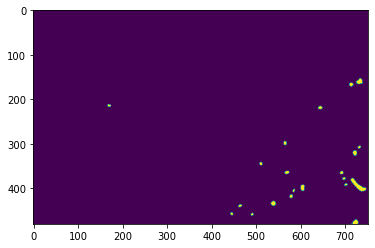

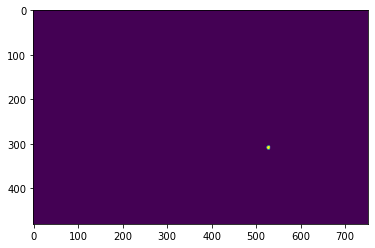

[INFO] examining component 8/23


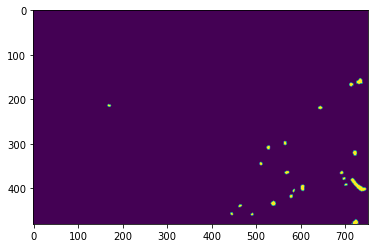

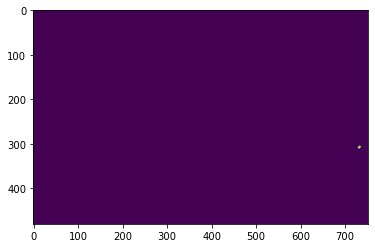

[INFO] examining component 9/23


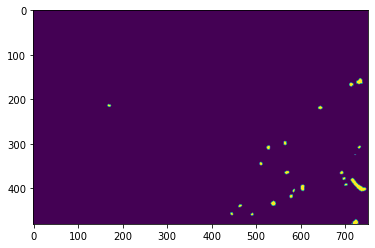

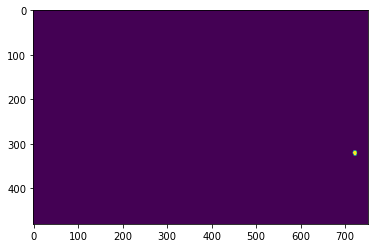

[INFO] examining component 10/23


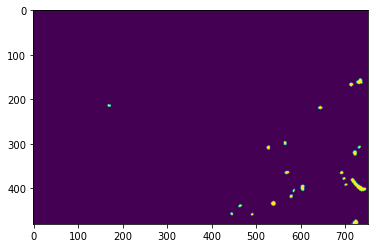

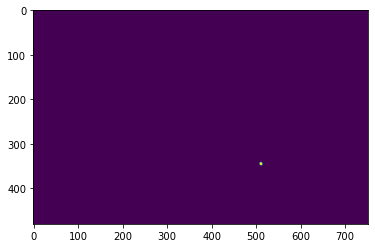

[INFO] examining component 11/23


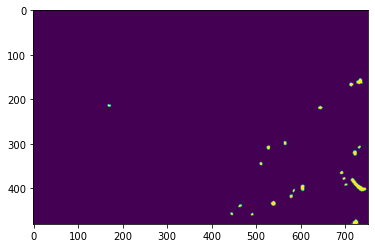

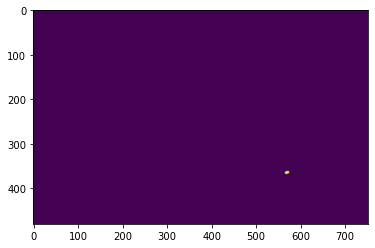

[INFO] examining component 12/23


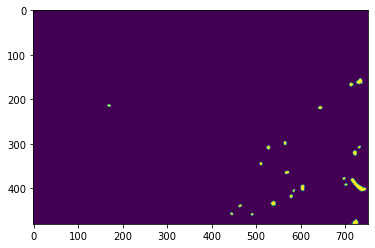

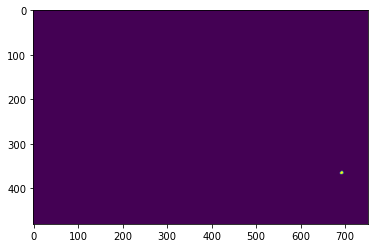

[INFO] examining component 13/23


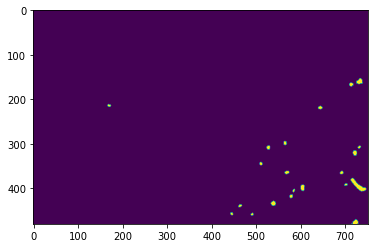

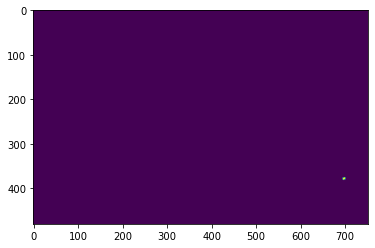

[INFO] examining component 14/23


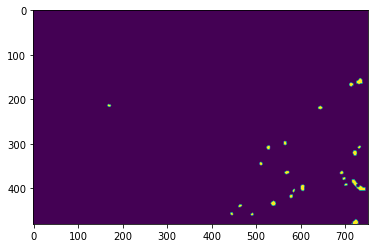

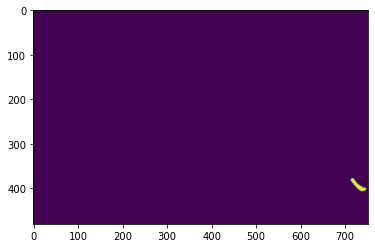

[INFO] examining component 15/23


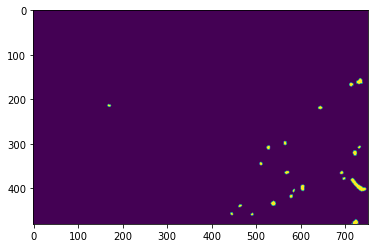

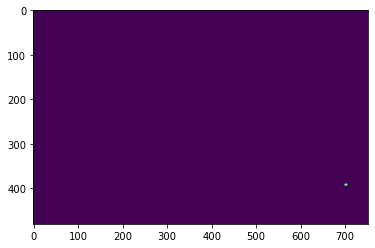

[INFO] examining component 16/23


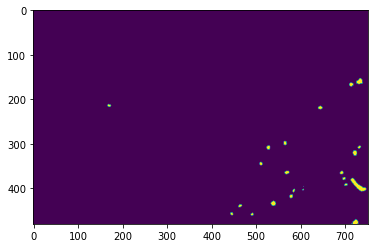

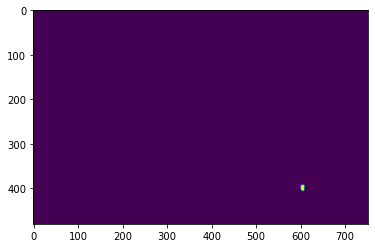

[INFO] examining component 17/23


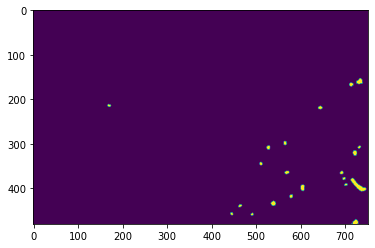

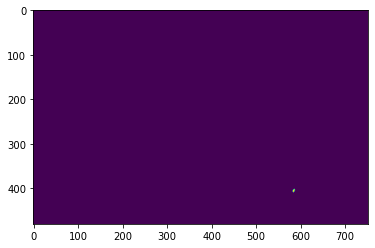

[INFO] examining component 18/23


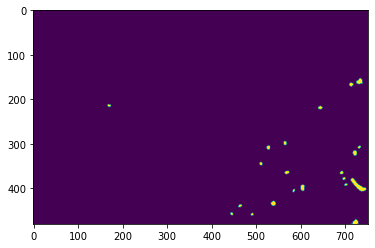

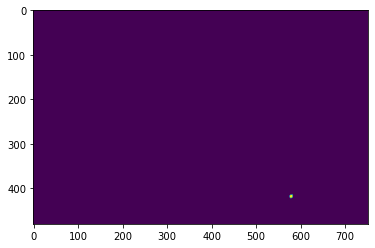

[INFO] examining component 19/23


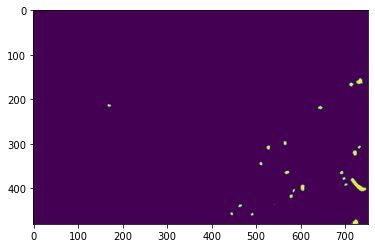

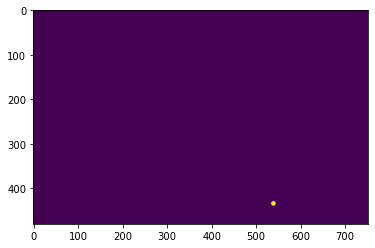

[INFO] examining component 20/23


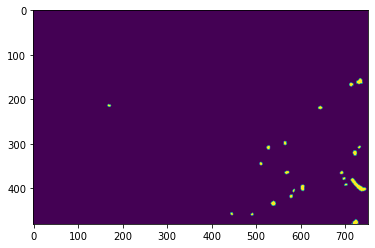

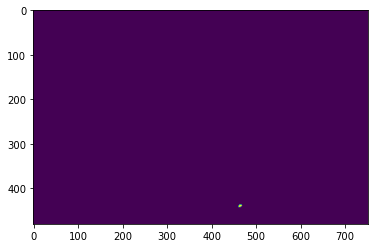

[INFO] examining component 21/23


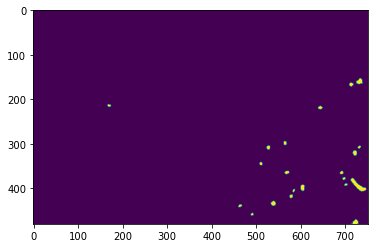

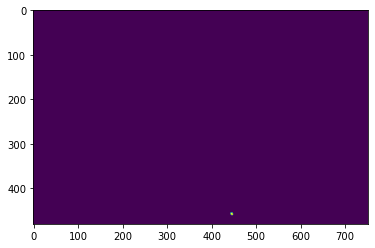

[INFO] examining component 22/23


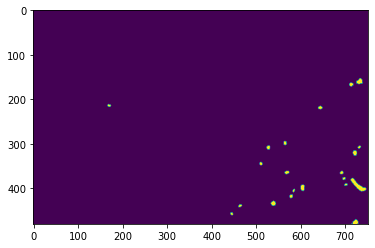

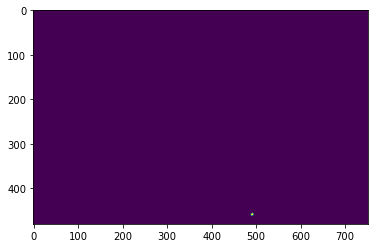

[INFO] examining component 23/23


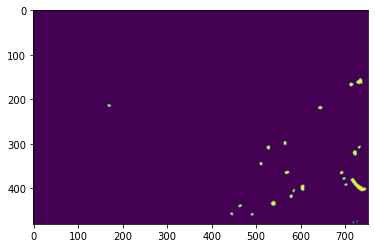

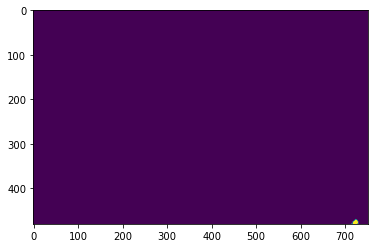

In [ ]:
# loop over the number of unique connected component labels
for i in range(0, numLabels):
    # if this is the first component then we examine the
    # *background* (typically we would just ignore this
    # component in our loop)
    if i == 0:
        text = "examining component {}/{} (background)".format(
            i + 1, numLabels)
    # otherwise, we are examining an actual connected component
    else:
        text = "examining component {}/{}".format( i + 1, numLabels)
    # print a status message update for the current connected
    # component
    print("[INFO] {}".format(text))
    # extract the connected component statistics and centroid for
    # the current label
    x = stats[i, cv2.CC_STAT_LEFT]   
    y = stats[i, cv2.CC_STAT_TOP]    
    w = stats[i, cv2.CC_STAT_WIDTH]  
    h = stats[i, cv2.CC_STAT_HEIGHT] 
    area = stats[i, cv2.CC_STAT_AREA]
    (cX, cY) = centroids[i]
    
    # clone our original image (so we can draw on it) and then draw
    # a bounding box surrounding the connected component along with
    # a circle corresponding to the centroid
    output = image.copy()
    cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
    cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)
    
    # construct a mask for the current connected component by
    # finding a pixels in the labels array that have the current
    # connected component ID
    componentMask = (labels == i).astype("uint8") * 255
    # show our output image and connected component mask
    plt.imshow(output)
    plt.show()
    plt.imshow(componentMask)
    plt.show()
    